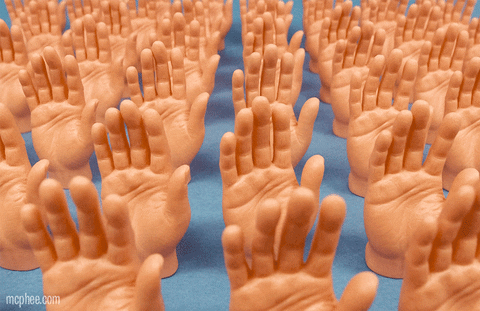

# imports

In [96]:
import numpy as np 
import warnings
from sklearn.dummy import DummyClassifier
warnings.filterwarnings('ignore')
import xgboost
import os      
from sklearn.tree import DecisionTreeClassifier
from random import shuffle
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
scores=dict()
from sklearn.metrics import confusion_matrix
from numba import jit, cuda
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score
import glob
from numpy import nan
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [2]:
#arrange the df after manipulation
def RefreshData(df):
    df.dropna
    df.reset_index(drop=True, inplace = True)
    df.sort_index(inplace=True)

In [3]:
# time drop
def time_drop(df):
    x=df['Time'].values[0]+7
    indexNames = df[df['Time'] <= x].index
    df.drop(indexNames , inplace=True)
    return df  

In [4]:
#merge rowes
def merge_rowes(df):
    df.set_index(" Hand Type", inplace = True)
    df_lf_sync = df.loc[["left"]].reset_index()
    df_rg_sync = df.loc[["right"]].reset_index()
    df_sync= pd.merge(df_lf_sync , df_rg_sync, left_index=True, right_index=True, how='outer')
    return df_sync

In [5]:
# drop worng num of hands
def drop_hands(df,x):
    indexNames = df[df[' # hands'] == x].index
    df.drop(indexNames , inplace=True)
    return df

In [6]:
#import the "sync" data
path = r'C:\Users\avida\Downloads\final_files\extraFiles\Training\Sync' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None,)
    time_drop(df)
    drop_hands(df,1)
    li.append(df)
    frame_sy = pd.concat(li, axis=0, ignore_index=True)  

In [7]:
#merging the rows
frame_sy=merge_rowes(frame_sy)
frame_sy

,Hand Type_x,Time_x,Frame ID_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,left,434.2387,139878,2,-80.92312,284.2069,29.011070,84.47700,-45.59256,134.20850,...,-0.320716,143.0681,170.9626,92.10286,290.9513,-17.46554,156.27410,0.0,0.036538,0.0
1,left,434.2553,139880,2,-79.71033,282.4789,31.691100,55.75132,-119.51820,158.45370,...,-0.333641,143.3853,166.9691,94.34527,293.7114,-20.13464,156.68940,0.0,0.001488,0.0
2,left,434.2718,139882,2,-78.84495,279.8847,35.125760,29.94153,-131.54950,221.05070,...,-0.344350,143.3656,163.3614,96.39383,296.6688,-21.13594,159.25370,0.0,0.000000,0.0
3,left,434.2884,139884,2,-78.32854,276.6696,39.055000,30.61737,-215.07260,227.43820,...,-0.348027,143.4148,160.7079,98.58353,302.2607,-18.51196,162.93200,0.0,0.000000,0.0
4,left,434.3050,139885,2,-77.92608,275.3798,40.843280,46.92449,-150.37140,208.49700,...,-0.352852,143.7286,159.9267,100.24120,306.1171,-15.97084,164.91400,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34039,left,856.1965,67304,2,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.01207,...,-0.495629,129.1261,148.7041,62.82404,300.6781,-33.58672,128.75430,0.0,0.000000,0.0
34040,left,856.2291,67306,2,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.77054,...,-0.525644,129.2868,148.1146,63.11218,285.6505,-53.66640,106.02620,0.0,0.000000,0.0
34041,left,856.2631,67309,2,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.63277,...,-0.574317,131.8590,149.6264,66.09853,283.6185,-58.03491,95.29868,0.0,0.000000,0.0
34042,left,856.2958,67311,2,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,...,-0.612753,134.0416,151.5924,68.17693,288.9688,-54.13820,94.23959,0.0,0.000000,0.0


In [8]:
#import the "spontan" data
path = r'C:\Users\avida\Downloads\final_files\extraFiles\Training\Spontan' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    time_drop(df)
    drop_hands(df,1)
    li.append(df)
    frame_sp = pd.concat(li, axis=0, ignore_index=True)  

In [9]:
#merging the rows
frame_sp =merge_rowes(frame_sp)
frame_sp

,Hand Type_x,Time_x,Frame ID_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,left,343.0061,129364,2,-102.28700,198.3166,-2.122641,-174.57210,379.14680,28.479910,...,-0.563396,191.4088,170.3479,8.976357,323.5327,21.27053,162.7099,1.000000,2.793122,0.329752
1,left,343.0227,129365,2,-103.87210,201.4944,-2.063620,-178.50250,357.85480,6.646493,...,-0.560823,190.8670,170.1528,9.191355,323.1941,20.16283,161.8589,1.000000,2.704073,0.293775
2,left,343.0392,129367,2,-106.36910,207.4667,-2.337110,-126.78780,318.52840,-12.872290,...,-0.554623,190.4547,169.7302,10.512530,324.1130,19.09524,161.3746,1.000000,2.422549,0.175940
3,left,343.0558,129369,2,-107.95090,212.1324,-2.788956,-74.28078,244.48230,-30.771300,...,-0.548808,190.8024,170.2935,12.170700,323.0928,17.14600,161.7030,1.000000,2.101400,0.052777
4,left,343.0723,129371,2,-109.54270,216.8003,-3.337280,-96.49666,269.54340,-37.723870,...,-0.553877,192.5801,172.1215,12.837430,325.7650,19.51061,162.1241,0.849696,1.878483,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34177,left,673.4224,52505,2,-93.01819,221.5837,37.953460,93.66040,-705.10900,-58.953580,...,-0.651545,198.7744,148.9755,36.172150,429.8078,88.65751,136.2759,0.000000,0.256132,0.000000
34178,left,673.4561,52509,2,-87.87977,207.0944,30.250840,161.30820,-332.78340,-239.552200,...,-0.555046,198.7646,147.6285,30.820090,424.2537,67.32506,129.2876,0.000000,0.275538,0.000000
34179,left,673.4894,52512,2,-81.66566,203.9826,24.040280,240.80950,-160.56200,-222.444200,...,-0.491103,199.4005,147.6265,27.941760,413.8865,47.81111,132.7705,0.000000,0.342347,0.000000
34180,left,673.5233,52516,2,-77.57621,198.9182,20.579730,127.00290,-218.65710,-80.403090,...,-0.452287,200.4651,148.9561,25.427530,400.5782,31.01108,139.2796,0.000000,0.448368,0.000000


In [10]:
#import the "Alone" data
path = r'C:\Users\avida\Downloads\final_files\extraFiles\Training\Alone' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    time_drop(df)
    drop_hands(df,2)
    li.append(df)
    frame_alone = pd.concat(li, axis=0, ignore_index=True)   

In [11]:
 frame_alone

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,525.8185,150428,left,1,-52.96039,184.5535,-2.856696,162.152700,127.605200,-85.837820,...,1.199751,-101.04550,132.5940,4.449887,-307.7127,-12.177800,5.125422,0.000000,0.073635,0.000000
1,525.8351,150430,left,1,-50.04434,185.5024,-4.845364,102.824800,-24.843370,-79.465040,...,1.171960,-95.51471,131.5824,2.853924,-313.0367,3.746006,-0.704697,0.000000,0.018766,0.000000
2,525.8516,150432,left,1,-49.07749,182.2930,-6.442950,12.123600,-258.752600,-99.409020,...,1.152816,-94.32024,128.7403,2.742160,-322.1467,20.402740,-2.617105,0.000000,0.018409,0.000000
3,525.8682,150434,left,1,-50.89614,176.7708,-9.005262,-53.572920,-271.015000,-143.033300,...,1.114818,-99.72611,127.6519,5.047988,-331.5826,28.883190,-7.521224,0.000000,0.149852,0.000000
4,525.8848,150436,left,1,-51.76074,174.1853,-10.600340,-40.958830,-140.443900,-59.856200,...,1.091361,-102.66840,128.2257,6.734126,-333.9562,27.848030,-3.312394,0.000000,0.242324,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34439,764.4578,59984,left,1,-125.81370,214.8894,20.593240,20.170870,19.997410,37.082170,...,0.409534,-146.63140,148.2971,44.407660,-258.0887,-77.529710,112.970600,0.116068,1.901876,0.000000
34440,764.4913,59986,left,1,-125.92320,215.6769,22.092640,-6.867068,21.957800,42.485630,...,0.399021,-146.11130,148.8045,45.689300,-253.6847,-80.136250,109.996700,0.134497,1.952747,0.000000
34441,764.5253,59988,left,1,-125.62170,215.7428,23.397500,17.454730,-3.217659,31.446690,...,0.379251,-144.81740,148.4588,46.660750,-249.6531,-83.331760,105.004300,0.120680,1.984825,0.000000
34442,764.5587,59989,left,1,-125.13520,215.6353,23.802480,25.567410,-5.648659,21.284490,...,0.368866,-143.84820,148.1024,46.728610,-248.2768,-84.269360,103.468300,0.097735,1.988376,0.000000


In [12]:
indexNames = frame_alone[frame_alone[' Hand Type'] == 'right'].index
# Delete these row indexes from dataFrame
frame_alone.drop(indexNames , inplace=True)

In [13]:
frame_alone=frame_alone.reset_index()

In [15]:
#import the "HandRight" data
path = r'C:\Users\avida\Downloads\final_files\extraFiles\HandRight' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    time_drop(df)
    drop_hands(df,2)
    li.append(df)
    df_right = pd.concat(li, axis=0, ignore_index=True) 

In [16]:
indexNames =df_right[df_right[' Hand Type'] == 'left'].index
# Delete these row indexes from dataFrame
df_right.drop(indexNames , inplace=True)

In [17]:
#droping the null data
df_right=df_right.dropna()

In [18]:
df_right

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,135.3024,16287,right,1,11.930320,199.9861,4.981665,-35.512210,-165.34660,-57.68153,...,-0.906612,75.457400,206.0521,45.38764,284.3946,140.01670,201.9318,0.0,0.561324,0.0
1,135.3194,16289,right,1,11.191900,195.3075,3.661716,-43.587440,-309.83740,-77.18515,...,-0.904311,74.461410,202.4562,44.28679,282.6278,140.97120,203.6773,0.0,0.626321,0.0
2,135.3357,16291,right,1,10.533080,189.0297,2.829388,-30.403600,-363.00330,-43.79815,...,-0.901862,73.600600,197.4387,43.54082,280.6384,142.54010,206.7526,0.0,0.636596,0.0
3,135.3524,16293,right,1,10.243000,181.9816,2.064330,-15.424000,-423.21200,-43.99948,...,-0.901268,73.195370,191.7202,42.73155,279.7357,148.13820,209.9330,0.0,0.701644,0.0
4,135.3690,16295,right,1,10.020610,174.8592,1.228467,-8.733602,-413.45130,-53.88054,...,-0.897777,72.686710,186.1613,41.98006,278.6890,152.52150,212.1112,0.0,0.786548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,201.0806,23867,right,1,-8.623579,163.7605,207.301100,-271.901400,-12.95597,1133.33900,...,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0
3889,201.0967,23869,right,1,-13.097740,162.5545,225.698500,-266.212900,-102.12860,1029.19300,...,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0
3890,201.1133,23871,right,1,-16.722380,160.9650,240.584400,-192.594300,-87.53856,769.65150,...,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0
3891,201.1299,23873,right,1,-19.684070,160.7849,251.099800,-158.997200,73.45740,557.20370,...,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416.7549,0.0,0.591905,0.0


In [19]:
#a variable 
df_right_copy=df_right

In [20]:
#making the df the same size as the alone data
li = []
for i in range (9):
    df = df_right_copy
    li.append(df)
    df_right_copymul = pd.concat(li, axis=0, ignore_index=True)

In [21]:
 df_right_copymul

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,135.3024,16287,right,1,11.930320,199.9861,4.981665,-35.512210,-165.34660,-57.68153,...,-0.906612,75.457400,206.0521,45.38764,284.3946,140.01670,201.9318,0.0,0.561324,0.0
1,135.3194,16289,right,1,11.191900,195.3075,3.661716,-43.587440,-309.83740,-77.18515,...,-0.904311,74.461410,202.4562,44.28679,282.6278,140.97120,203.6773,0.0,0.626321,0.0
2,135.3357,16291,right,1,10.533080,189.0297,2.829388,-30.403600,-363.00330,-43.79815,...,-0.901862,73.600600,197.4387,43.54082,280.6384,142.54010,206.7526,0.0,0.636596,0.0
3,135.3524,16293,right,1,10.243000,181.9816,2.064330,-15.424000,-423.21200,-43.99948,...,-0.901268,73.195370,191.7202,42.73155,279.7357,148.13820,209.9330,0.0,0.701644,0.0
4,135.3690,16295,right,1,10.020610,174.8592,1.228467,-8.733602,-413.45130,-53.88054,...,-0.897777,72.686710,186.1613,41.98006,278.6890,152.52150,212.1112,0.0,0.786548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35032,201.0806,23867,right,1,-8.623579,163.7605,207.301100,-271.901400,-12.95597,1133.33900,...,0.004875,5.541947,119.3280,267.78980,171.7839,-42.17188,410.2199,0.0,0.765803,0.0
35033,201.0967,23869,right,1,-13.097740,162.5545,225.698500,-266.212900,-102.12860,1029.19300,...,0.003377,1.698353,117.0805,285.09920,179.2368,-44.11964,413.5244,0.0,0.783391,0.0
35034,201.1133,23871,right,1,-16.722380,160.9650,240.584400,-192.594300,-87.53856,769.65150,...,0.004909,-1.484266,114.0260,298.58760,186.0559,-44.35751,415.7693,0.0,0.684677,0.0
35035,201.1299,23873,right,1,-19.684070,160.7849,251.099800,-158.997200,73.45740,557.20370,...,0.004470,-4.015731,112.9914,308.15980,190.9921,-42.38844,416.7549,0.0,0.591905,0.0


In [22]:
#making order in the new df
df_right_copymul.drop( df_right_copymul.tail(1096).index,
        inplace = True)
df_right_copymul=df_right_copymul.reset_index()
df_right_copymul.Time = frame_alone.Time
df_right_copymul[" Frame ID"]=frame_alone[" Frame ID"]

In [26]:
df_right_copymul

,index,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,0,525.8185,150428,right,1,11.93032,199.9861,4.981665,-35.512210,-165.3466,...,-0.906612,75.45740,206.0521,45.38764,284.3946,140.016700,201.9318,0.000000,0.561324,0.000000
1,1,525.8351,150430,right,1,11.19190,195.3075,3.661716,-43.587440,-309.8374,...,-0.904311,74.46141,202.4562,44.28679,282.6278,140.971200,203.6773,0.000000,0.626321,0.000000
2,2,525.8516,150432,right,1,10.53308,189.0297,2.829388,-30.403600,-363.0033,...,-0.901862,73.60060,197.4387,43.54082,280.6384,142.540100,206.7526,0.000000,0.636596,0.000000
3,3,525.8682,150434,right,1,10.24300,181.9816,2.064330,-15.424000,-423.2120,...,-0.901268,73.19537,191.7202,42.73155,279.7357,148.138200,209.9330,0.000000,0.701644,0.000000
4,4,525.8848,150436,right,1,10.02061,174.8592,1.228467,-8.733602,-413.4513,...,-0.897777,72.68671,186.1613,41.98006,278.6890,152.521500,212.1112,0.000000,0.786548,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33936,33936,764.4578,59984,right,1,12.21766,178.0383,-52.827330,72.118750,100.2048,...,-0.187480,34.46508,142.2028,11.41217,143.4343,20.008750,228.6101,0.000000,0.517045,0.000000
33937,33937,764.4913,59986,right,1,13.27968,180.4047,-51.762120,55.057170,158.7906,...,-0.171379,34.54566,142.2069,11.44530,142.2051,13.251450,225.3625,0.118533,0.996261,0.000000
33938,33938,764.5253,59988,right,1,14.50927,186.5876,-49.489490,79.068230,395.6981,...,-0.154703,34.56064,144.5531,11.65007,136.1476,2.774369,220.3593,0.612488,1.739914,0.048438
33939,33939,764.5587,59989,right,1,15.23813,190.3499,-48.043850,84.086890,434.0411,...,-0.148095,34.78383,146.0429,11.64473,134.2390,0.052951,218.4689,0.878373,2.123332,0.280677


In [27]:
#merge alone and right hand data to one df
df_right_copymul.set_index(" Hand Type", inplace = True)
frame_alone.set_index(" Hand Type", inplace = True) 
df_lf_sync = frame_alone.loc[["left"]].reset_index()
df_rg_sync = df_right_copymul.loc[["right"]].reset_index()
df_sync= pd.merge(df_lf_sync , df_rg_sync, left_index=True, right_index=True, how='outer')

In [28]:
#dropping column that don't makong change to the data
df_sync=df_sync.drop(['index_x','index_y'], axis = 1)

In [29]:
df_sync.columns


Index([' Hand Type_x', 'Time_x', ' Frame ID_x', ' # hands_x', ' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', ' Hand Type_y', 'Time_y', ' Frame ID_y',
       ' # hands_y', ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y'],
      dtype='object')

In [30]:
df_sync

,Hand Type_x,Time_x,Frame ID_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,left,525.8185,150428,1,-52.96039,184.5535,-2.856696,162.152700,127.605200,-85.837820,...,-0.906612,75.45740,206.0521,45.38764,284.3946,140.016700,201.9318,0.000000,0.561324,0.000000
1,left,525.8351,150430,1,-50.04434,185.5024,-4.845364,102.824800,-24.843370,-79.465040,...,-0.904311,74.46141,202.4562,44.28679,282.6278,140.971200,203.6773,0.000000,0.626321,0.000000
2,left,525.8516,150432,1,-49.07749,182.2930,-6.442950,12.123600,-258.752600,-99.409020,...,-0.901862,73.60060,197.4387,43.54082,280.6384,142.540100,206.7526,0.000000,0.636596,0.000000
3,left,525.8682,150434,1,-50.89614,176.7708,-9.005262,-53.572920,-271.015000,-143.033300,...,-0.901268,73.19537,191.7202,42.73155,279.7357,148.138200,209.9330,0.000000,0.701644,0.000000
4,left,525.8848,150436,1,-51.76074,174.1853,-10.600340,-40.958830,-140.443900,-59.856200,...,-0.897777,72.68671,186.1613,41.98006,278.6890,152.521500,212.1112,0.000000,0.786548,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33936,left,764.4578,59984,1,-125.81370,214.8894,20.593240,20.170870,19.997410,37.082170,...,-0.187480,34.46508,142.2028,11.41217,143.4343,20.008750,228.6101,0.000000,0.517045,0.000000
33937,left,764.4913,59986,1,-125.92320,215.6769,22.092640,-6.867068,21.957800,42.485630,...,-0.171379,34.54566,142.2069,11.44530,142.2051,13.251450,225.3625,0.118533,0.996261,0.000000
33938,left,764.5253,59988,1,-125.62170,215.7428,23.397500,17.454730,-3.217659,31.446690,...,-0.154703,34.56064,144.5531,11.65007,136.1476,2.774369,220.3593,0.612488,1.739914,0.048438
33939,left,764.5587,59989,1,-125.13520,215.6353,23.802480,25.567410,-5.648659,21.284490,...,-0.148095,34.78383,146.0429,11.64473,134.2390,0.052951,218.4689,0.878373,2.123332,0.280677


In [31]:
#adding type column to the data to be y_test
frame_sy["Type"] = 0
frame_sp["Type"]=1
df_sync["Type"]=2

In [32]:
pdList = [frame_sy,frame_sp,df_sync]  # List of your dataframes
df_all = pd.concat(pdList)

In [33]:
df_all =df_all.sort_values('Time_x')

In [34]:
df_all

,Hand Type_x,Time_x,Frame ID_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,Type
28445,left,182.5492,21577,2,-161.93030,215.8074,99.368170,12.80461,-43.17722,-168.68700,...,209.5091,172.5597,-2.273207,342.2353,15.95552,134.07660,0.0,1.476075,1.0,1
28446,left,182.5659,21579,2,-161.32040,214.3152,96.388420,20.12839,-83.41072,-164.68020,...,210.0906,172.0918,-1.983218,342.6916,16.18578,135.29430,0.0,1.474956,1.0,1
28447,left,182.5823,21581,2,-161.17540,214.2668,93.776190,26.72322,-21.68755,-161.18140,...,210.3185,171.5113,-1.979968,343.1189,16.28249,135.87790,0.0,1.474284,1.0,1
28448,left,182.5990,21582,2,-160.70280,213.7240,92.251300,54.83594,-62.98368,-176.94200,...,210.5154,171.2924,-2.009449,343.6653,16.53986,136.04660,0.0,1.469920,1.0,1
28449,left,182.6154,21584,2,-161.22440,213.5300,90.049910,-21.88871,-43.74665,-129.30340,...,211.0113,170.9632,-2.211502,346.8622,19.01384,136.32600,0.0,1.451241,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34039,left,856.1965,67304,2,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.01207,...,129.1261,148.7041,62.824040,300.6781,-33.58672,128.75430,0.0,0.000000,0.0,0
34040,left,856.2291,67306,2,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.77054,...,129.2868,148.1146,63.112180,285.6505,-53.66640,106.02620,0.0,0.000000,0.0,0
34041,left,856.2631,67309,2,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.63277,...,131.8590,149.6264,66.098530,283.6185,-58.03491,95.29868,0.0,0.000000,0.0,0
34042,left,856.2958,67311,2,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,...,134.0416,151.5924,68.176930,288.9688,-54.13820,94.23959,0.0,0.000000,0.0,0


In [35]:
path = r'C:\Users\avida\Downloads\final_files\extraFiles\Validation\sync' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None,)
    time_drop(df)
    drop_hands(df,1)
    li.append(df)
    test_sy = pd.concat(li, axis=0, ignore_index=True) 

In [36]:
test_sy=merge_rowes(test_sy)

In [37]:
path = r'C:\Users\avida\Downloads\final_files\extraFiles\Validation\spontan' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None,)
    time_drop(df)
    drop_hands(df,1)
    li.append(df)
    test_spon = pd.concat(li, axis=0, ignore_index=True) 

In [38]:
 test_spon=merge_rowes(test_spon)

In [39]:
path = r'C:\Users\avida\Downloads\final_files\extraFiles\Validation\alone' 
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None,)
    time_drop(df)
    drop_hands(df,2)
    li.append(df)
    test_alone = pd.concat(li, axis=0, ignore_index=True)   

In [40]:
indexNames = test_alone[test_alone[' Hand Type'] == 'right'].index
# Delete these row indexes from dataFrame
test_alone.drop(indexNames , inplace=True)

In [41]:
test_alone

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,962.0724,112175,left,1,-139.56040,289.5980,55.82040,85.41927,-314.15190,-17.789130,...,1.327694,-200.4914,261.7830,63.46514,-379.1310,110.43980,116.0856,0.000000,0.911471,0.0
1,962.0892,112177,left,1,-137.84700,284.6244,55.60830,98.89174,-268.35150,-9.115684,...,1.326555,-199.0760,257.3272,63.25856,-383.5433,112.63620,114.6168,0.000000,0.909256,0.0
2,962.1058,112179,left,1,-135.24040,278.1614,55.07768,178.59840,-410.27810,-36.843320,...,1.329647,-196.5786,251.0247,62.48919,-381.9569,106.81380,111.8799,0.000000,0.927328,0.0
3,962.1220,112181,left,1,-131.68600,270.3371,54.44700,211.49920,-477.68290,-41.604380,...,1.334645,-194.7839,247.8369,62.06263,-384.9341,110.54120,112.9955,0.000000,0.950314,0.0
4,962.1385,112183,left,1,-128.48180,263.2296,53.83574,181.64070,-393.89460,-33.762600,...,1.341400,-191.7350,241.1172,61.10778,-381.3579,103.24660,112.4520,0.016646,1.015807,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,796.7517,50329,left,1,-62.14733,282.7198,62.15659,-90.00631,-129.34680,-50.105870,...,0.853153,-107.4325,230.6662,88.71685,-297.5073,60.94059,148.1517,0.000000,0.149477,0.0
9961,796.7842,50331,left,1,-64.38816,276.7341,60.39418,-51.70352,-204.26430,-56.992680,...,0.791928,-108.3709,224.7578,89.17332,-293.6125,50.64548,151.1262,0.000000,0.205101,0.0
9962,796.8187,50333,left,1,-65.33954,272.7191,59.17199,-27.79678,-111.88810,-42.745720,...,0.758811,-108.3173,220.3898,88.81828,-290.7480,44.09612,152.9062,0.000000,0.304604,0.0
9963,796.8510,50336,left,1,-67.02361,268.6757,57.91473,-31.61606,-76.33112,-24.734110,...,0.730031,-108.7151,215.5677,88.03761,-285.7091,36.18958,158.4956,0.000000,0.374116,0.0


In [42]:
li = []
for i in range (3):
    df = df_right_copy
    li.append(df)
    df_right_test = pd.concat(li, axis=0, ignore_index=True)

In [43]:
df_right_test
df_right_test.drop(df_right_test.tail(1714).index,
        inplace = True)

In [44]:
df_right_test.Time = test_alone.Time

In [45]:
df_right_test[" Frame ID"]=test_alone[" Frame ID"]

In [46]:
df_right_test.set_index(" Hand Type", inplace = True)
test_alone.set_index(" Hand Type", inplace = True) 
df_lf_sync = test_alone.loc[["left"]].reset_index()
df_rg_sync = df_right_test.loc[["right"]].reset_index()
df_test_alone= pd.merge(df_lf_sync , df_rg_sync, left_index=True, right_index=True, how='outer')

In [47]:
test_sy["Type"] = 0
test_spon["Type"]=1
df_test_alone["Type"]=2

In [48]:
pdtest= [test_sy,test_spon,df_test_alone]  # List of your dataframes
df_all_test = pd.concat(pdtest)

In [49]:
df_all

,Hand Type_x,Time_x,Frame ID_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,Type
28445,left,182.5492,21577,2,-161.93030,215.8074,99.368170,12.80461,-43.17722,-168.68700,...,209.5091,172.5597,-2.273207,342.2353,15.95552,134.07660,0.0,1.476075,1.0,1
28446,left,182.5659,21579,2,-161.32040,214.3152,96.388420,20.12839,-83.41072,-164.68020,...,210.0906,172.0918,-1.983218,342.6916,16.18578,135.29430,0.0,1.474956,1.0,1
28447,left,182.5823,21581,2,-161.17540,214.2668,93.776190,26.72322,-21.68755,-161.18140,...,210.3185,171.5113,-1.979968,343.1189,16.28249,135.87790,0.0,1.474284,1.0,1
28448,left,182.5990,21582,2,-160.70280,213.7240,92.251300,54.83594,-62.98368,-176.94200,...,210.5154,171.2924,-2.009449,343.6653,16.53986,136.04660,0.0,1.469920,1.0,1
28449,left,182.6154,21584,2,-161.22440,213.5300,90.049910,-21.88871,-43.74665,-129.30340,...,211.0113,170.9632,-2.211502,346.8622,19.01384,136.32600,0.0,1.451241,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34039,left,856.1965,67304,2,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.01207,...,129.1261,148.7041,62.824040,300.6781,-33.58672,128.75430,0.0,0.000000,0.0,0
34040,left,856.2291,67306,2,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.77054,...,129.2868,148.1146,63.112180,285.6505,-53.66640,106.02620,0.0,0.000000,0.0,0
34041,left,856.2631,67309,2,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.63277,...,131.8590,149.6264,66.098530,283.6185,-58.03491,95.29868,0.0,0.000000,0.0,0
34042,left,856.2958,67311,2,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,...,134.0416,151.5924,68.176930,288.9688,-54.13820,94.23959,0.0,0.000000,0.0,0


In [52]:
df_all_test=df_all_test.drop(['Time_y', ' Frame ID_y','Time_x',' Frame ID_x',' Hand Type_x',' # hands_x', ' # hands_y'], axis = 1)
df_all=df_all.drop(['Time_y', ' Frame ID_y','Time_x',' Frame ID_x',' Hand Type_x',' # hands_x', ' # hands_y'], axis = 1)

In [90]:
df_all.columns

Index([' Position X_x', ' Position Y_x', ' Position Z_x', ' Velocity X_x',
       ' Velocity Y_x', ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x',
       ' Wrist Pos X_x', ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x',
       ' Elbow Pos Y_x', ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', ' Hand Type_y', ' Position X_y', ' Position Y_y',
       ' Position Z_y', ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y',
       ' Pitch_y', ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y', 'Type'],
      dtype='object')

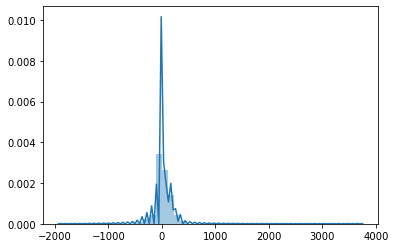

In [91]:
#the distribution of all the data after cleaning
sns.distplot(df_all);

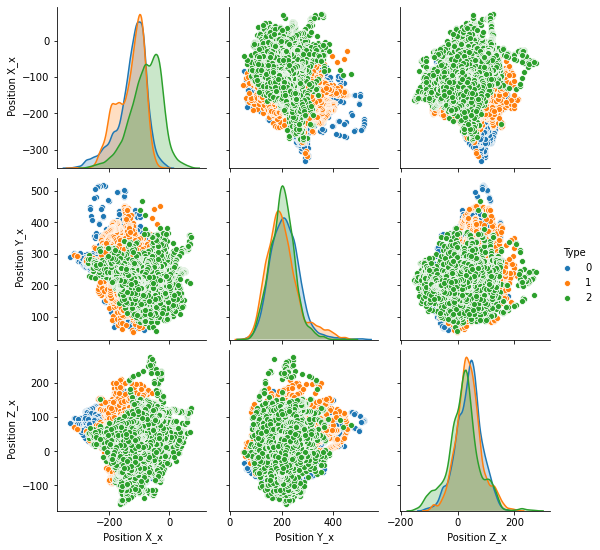

In [93]:
sns.pairplot(df_all, hue='Type',vars=[' Position X_x', ' Position Y_x', ' Position Z_x'])

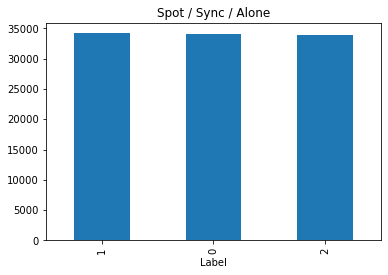

In [54]:
df_all['Type'].value_counts().plot.bar()
plt.title('Spot / Sync / Alone')
plt.xlabel('Label')
plt.show()

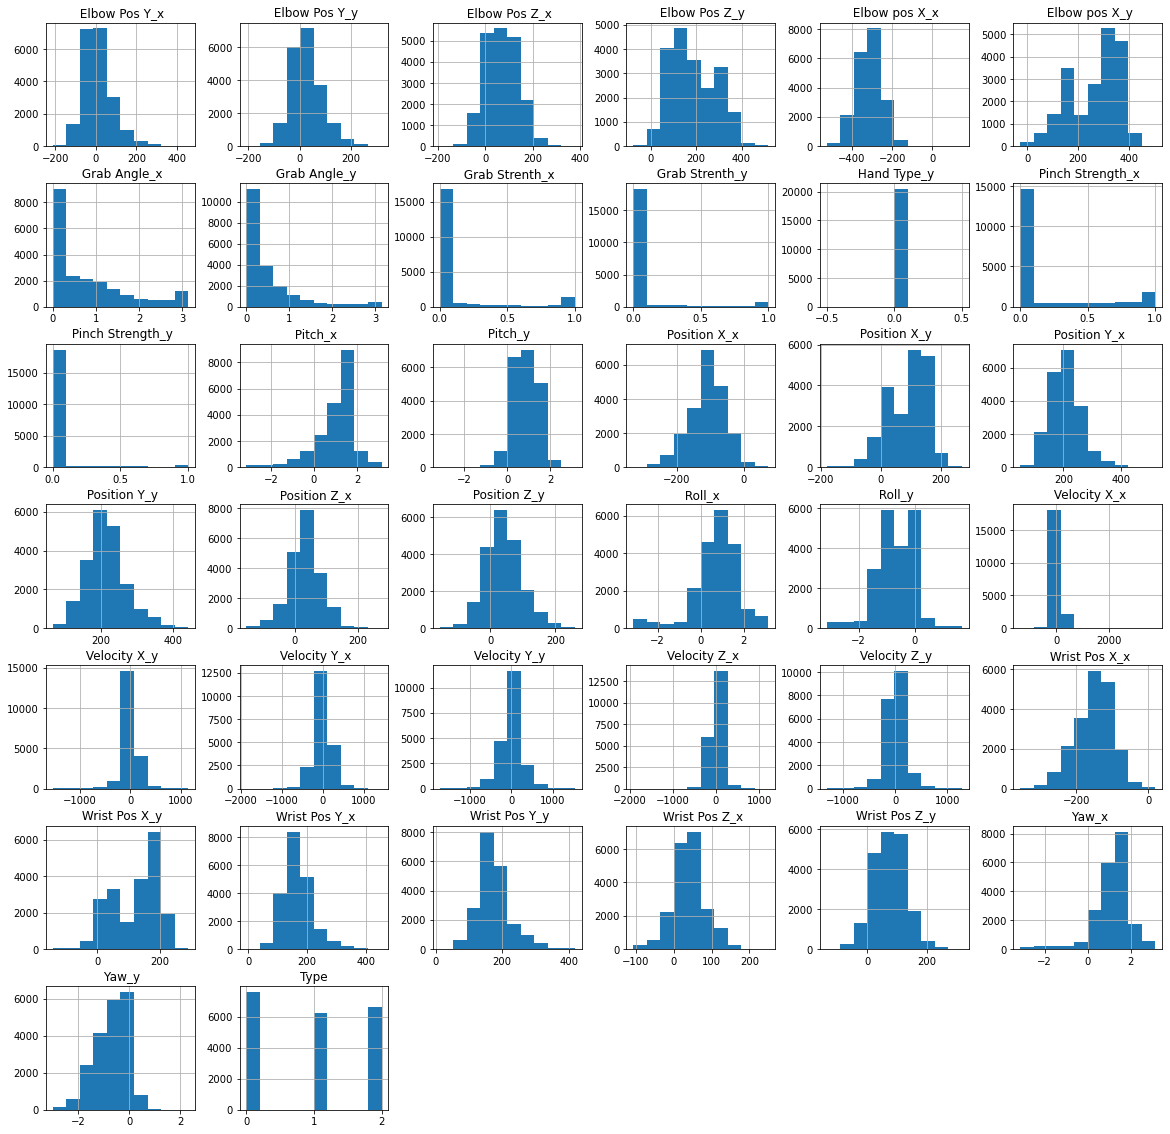

In [94]:
df_all.hist(figsize=(20,20));

In [55]:
df_all

,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,Wrist Pos X_x,...,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,Type
28445,-161.93030,215.8074,99.368170,12.80461,-43.17722,-168.68700,1.445794,0.597092,1.481299,-219.6073,...,209.5091,172.5597,-2.273207,342.2353,15.95552,134.07660,0.0,1.476075,1.0,1
28446,-161.32040,214.3152,96.388420,20.12839,-83.41072,-164.68020,1.420835,0.606304,1.461140,-218.7959,...,210.0906,172.0918,-1.983218,342.6916,16.18578,135.29430,0.0,1.474956,1.0,1
28447,-161.17540,214.2668,93.776190,26.72322,-21.68755,-161.18140,1.396630,0.600762,1.442930,-218.8913,...,210.3185,171.5113,-1.979968,343.1189,16.28249,135.87790,0.0,1.474284,1.0,1
28448,-160.70280,213.7240,92.251300,54.83594,-62.98368,-176.94200,1.394494,0.609358,1.438825,-218.2660,...,210.5154,171.2924,-2.009449,343.6653,16.53986,136.04660,0.0,1.469920,1.0,1
28449,-161.22440,213.5300,90.049910,-21.88871,-43.74665,-129.30340,1.395495,0.642190,1.430675,-217.8921,...,211.0113,170.9632,-2.211502,346.8622,19.01384,136.32600,0.0,1.451241,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34039,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.01207,0.629213,1.887313,0.429763,-107.8500,...,129.1261,148.7041,62.824040,300.6781,-33.58672,128.75430,0.0,0.000000,0.0,0
34040,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.77054,0.667618,1.870251,0.434664,-108.0805,...,129.2868,148.1146,63.112180,285.6505,-53.66640,106.02620,0.0,0.000000,0.0,0
34041,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.63277,0.725945,1.838532,0.456099,-109.0018,...,131.8590,149.6264,66.098530,283.6185,-58.03491,95.29868,0.0,0.000000,0.0,0
34042,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,0.762549,1.824587,0.459446,-109.7250,...,134.0416,151.5924,68.176930,288.9688,-54.13820,94.23959,0.0,0.000000,0.0,0


In [56]:
df_all

,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,Wrist Pos X_x,...,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,Type
28445,-161.93030,215.8074,99.368170,12.80461,-43.17722,-168.68700,1.445794,0.597092,1.481299,-219.6073,...,209.5091,172.5597,-2.273207,342.2353,15.95552,134.07660,0.0,1.476075,1.0,1
28446,-161.32040,214.3152,96.388420,20.12839,-83.41072,-164.68020,1.420835,0.606304,1.461140,-218.7959,...,210.0906,172.0918,-1.983218,342.6916,16.18578,135.29430,0.0,1.474956,1.0,1
28447,-161.17540,214.2668,93.776190,26.72322,-21.68755,-161.18140,1.396630,0.600762,1.442930,-218.8913,...,210.3185,171.5113,-1.979968,343.1189,16.28249,135.87790,0.0,1.474284,1.0,1
28448,-160.70280,213.7240,92.251300,54.83594,-62.98368,-176.94200,1.394494,0.609358,1.438825,-218.2660,...,210.5154,171.2924,-2.009449,343.6653,16.53986,136.04660,0.0,1.469920,1.0,1
28449,-161.22440,213.5300,90.049910,-21.88871,-43.74665,-129.30340,1.395495,0.642190,1.430675,-217.8921,...,211.0113,170.9632,-2.211502,346.8622,19.01384,136.32600,0.0,1.451241,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34039,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.01207,0.629213,1.887313,0.429763,-107.8500,...,129.1261,148.7041,62.824040,300.6781,-33.58672,128.75430,0.0,0.000000,0.0,0
34040,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.77054,0.667618,1.870251,0.434664,-108.0805,...,129.2868,148.1146,63.112180,285.6505,-53.66640,106.02620,0.0,0.000000,0.0,0
34041,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.63277,0.725945,1.838532,0.456099,-109.0018,...,131.8590,149.6264,66.098530,283.6185,-58.03491,95.29868,0.0,0.000000,0.0,0
34042,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,0.762549,1.824587,0.459446,-109.7250,...,134.0416,151.5924,68.176930,288.9688,-54.13820,94.23959,0.0,0.000000,0.0,0


In [58]:
df_all

,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,Wrist Pos X_x,...,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,Type
28445,-161.93030,215.8074,99.368170,12.80461,-43.17722,-168.68700,1.445794,0.597092,1.481299,-219.6073,...,209.5091,172.5597,-2.273207,342.2353,15.95552,134.07660,0.0,1.476075,1.0,1
28446,-161.32040,214.3152,96.388420,20.12839,-83.41072,-164.68020,1.420835,0.606304,1.461140,-218.7959,...,210.0906,172.0918,-1.983218,342.6916,16.18578,135.29430,0.0,1.474956,1.0,1
28447,-161.17540,214.2668,93.776190,26.72322,-21.68755,-161.18140,1.396630,0.600762,1.442930,-218.8913,...,210.3185,171.5113,-1.979968,343.1189,16.28249,135.87790,0.0,1.474284,1.0,1
28448,-160.70280,213.7240,92.251300,54.83594,-62.98368,-176.94200,1.394494,0.609358,1.438825,-218.2660,...,210.5154,171.2924,-2.009449,343.6653,16.53986,136.04660,0.0,1.469920,1.0,1
28449,-161.22440,213.5300,90.049910,-21.88871,-43.74665,-129.30340,1.395495,0.642190,1.430675,-217.8921,...,211.0113,170.9632,-2.211502,346.8622,19.01384,136.32600,0.0,1.451241,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34039,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.01207,0.629213,1.887313,0.429763,-107.8500,...,129.1261,148.7041,62.824040,300.6781,-33.58672,128.75430,0.0,0.000000,0.0,0
34040,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.77054,0.667618,1.870251,0.434664,-108.0805,...,129.2868,148.1146,63.112180,285.6505,-53.66640,106.02620,0.0,0.000000,0.0,0
34041,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.63277,0.725945,1.838532,0.456099,-109.0018,...,131.8590,149.6264,66.098530,283.6185,-58.03491,95.29868,0.0,0.000000,0.0,0
34042,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,0.762549,1.824587,0.459446,-109.7250,...,134.0416,151.5924,68.176930,288.9688,-54.13820,94.23959,0.0,0.000000,0.0,0


In [59]:
#taking each 5 row to the train data by the instruction
df_all = df_all.iloc[::5, :]
df_all_test = df_all_test.iloc[::5, :]
RefreshData(df_all)
RefreshData(df_all_test)

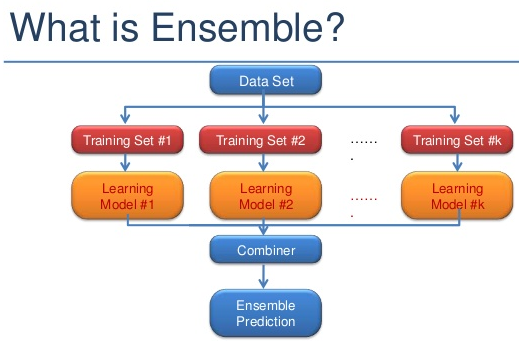

# train\test split 

In [60]:
X_train=df_all.drop(columns='Type')
y_train=df_all['Type']
X_test=df_all_test.drop(columns='Type')
y_test=df_all_test['Type']

# scaling

# scaling the data as the values are centered around the mean with a unit standard deviation.

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

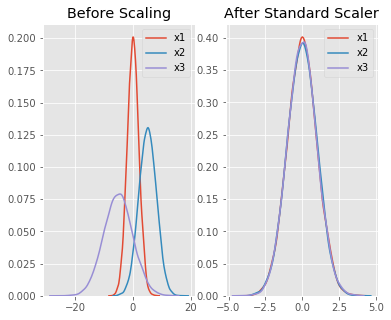

Although normalization via min-max scaling is a commonly used technique that is useful when we need values in a bounded interval,
standardization can be more practical for many machine learning algorithms. The reason is that many linear models,
such as the logistic regression and SVM,
[...] initialize the weights to 0 or small random values close to 0. Using standardization,
we center the feature columns at mean 0 with standard deviation 1 so that the feature columns take the form of a normal distribution, which makes it easier to learn the weights. Furthermore, standardization maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling,
which scales the data to a limited range of values

In [61]:
#define the scale function
scale = StandardScaler()
X_train = pd.DataFrame(scale.fit_transform(X_train.values), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scale.fit_transform(X_test.values), columns=X_test.columns, index=X_test.index)

In [62]:
X_train

,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,Wrist Pos X_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,-0.955007,0.148329,1.304713,0.092636,-0.201829,-1.346137,0.452493,-0.146029,0.413445,-1.314458,...,-0.083164,1.200644,-0.055861,-1.409663,0.776346,-0.170422,-0.522004,-0.300515,1.447411,5.255788
1,-0.942001,0.087170,1.070319,0.027357,-0.220926,-1.198583,0.377796,-0.120994,0.340531,-1.290725,...,-0.169896,1.224983,-0.086331,-1.419065,0.859576,-0.070862,-0.505529,-0.300515,1.385183,5.255788
2,-0.953039,0.108918,0.895394,-0.225472,0.110321,-0.589345,0.348662,-0.063234,0.289289,-1.259583,...,-0.542679,1.257606,-0.031031,-1.581446,0.805124,0.064174,-0.467257,-0.300515,0.887908,5.255788
3,-0.936695,0.046305,0.761067,0.161678,-0.333424,-0.567431,0.254132,-0.123841,0.236040,-1.284202,...,-1.038019,1.525773,0.092292,-1.696013,1.096299,0.021694,-0.705551,-0.300515,-0.339793,-0.270553
4,-0.930209,-0.008263,0.604397,-0.357753,0.047930,-0.558306,0.123631,-0.078484,0.095108,-1.237856,...,-1.334893,1.617285,0.124795,-1.964263,1.485423,0.458135,-0.963534,-0.300515,-0.133625,-0.270553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20429,0.814947,-1.195391,-1.196931,0.110732,-0.581472,-0.247808,-1.021429,1.448471,-0.661025,0.846448,...,0.282767,0.141081,-0.502129,-0.324209,0.778445,0.383049,-0.181756,-0.300515,-0.743850,-0.270553
20430,0.776785,-1.198814,-1.244569,-0.103970,0.151475,-0.111940,-1.044600,1.477229,-0.673053,0.815246,...,0.286393,0.141458,-0.485230,-0.300905,0.780090,0.447409,-0.144260,-0.300515,-0.743850,-0.270553
20431,0.648158,-0.975679,-1.190718,-0.290492,0.390030,0.599494,-0.911675,1.426373,-0.703297,0.710499,...,0.317280,0.158035,-0.456513,-0.266041,0.792077,0.243315,-0.260486,-0.300515,-0.743850,-0.270553
20432,0.619379,-0.714066,-1.015559,-0.010465,0.332992,0.486102,-0.537748,1.158926,-0.793692,0.807622,...,0.380983,0.116366,-0.465792,-0.215420,0.579714,-0.116165,-0.139064,-0.300515,-0.743850,-0.270553


# pca

The principal components of a collection of points in a real coordinate space are a sequence of p unit vectors,
where the i-th vector is the direction of a line that best fits the data while being orthogonal to the first i-1 vectors.
Here
,a best-fitting line is defined as one that minimizes the average squared distance from the points to the line.
These directions constitute an orthonormal basis in which different individual dimensions of the data are linearly uncorrelated.
Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data,
sometimes using only the first few principal components and ignoring the rest.

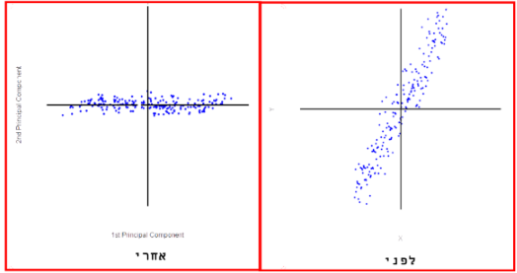

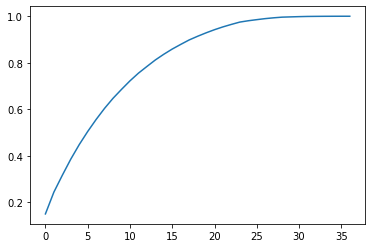

In [63]:
#checking how much components we can remove from the data without making a big reduce to the accuracy
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [64]:
#we saw that the elbow is long so we can remove 9 features and still get a high accuracy,lets try it
pca = PCA(n_components=28)
train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("numer of attributes after PCA: ",pca.n_components_,"\nnumber of attributes before PCA: ",len(list(X_train.columns)))

numer of attributes after PCA:  28 
number of attributes before PCA:  37


28


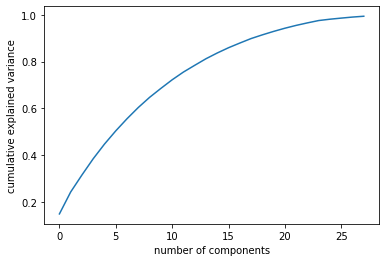

In [65]:
#as we can see in the plot another remove will damage the data
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
print(pca.n_components_)

In [66]:
# set the vector X (train\test) with the new features
X_train_PCA1 = pd.DataFrame(train_pca)
X_test_PCA1 = pd.DataFrame(X_test_pca)

In [67]:
#a function to produce the confusion matrix and classification report togther
def stats(model):
    y_pred=model.predict(X_test_PCA1)
    plt.figure(1, figsize= (10,10))
    c_m=confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
    print("Confusion Matrix ")
    sns.heatmap(c_m.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    plt.close()
    print(classification_report(y_test, y_pred,digits=4))

In [68]:
X_test_PCA1.shape

(6021, 28)

# DummyClassifier

1.Most Frequent: The classifier always predicts the most frequent class label in the training data.

2.Stratified: It generates predictions by respecting the class distribution of the training data. It is different from the “most frequent” strategy as it instead associates a probability with each data point of being the most frequent class label.

3.Uniform: It generates predictions uniformly at random.

[0.330842052815147, 0.3384819797375851, 0.3273542600896861]


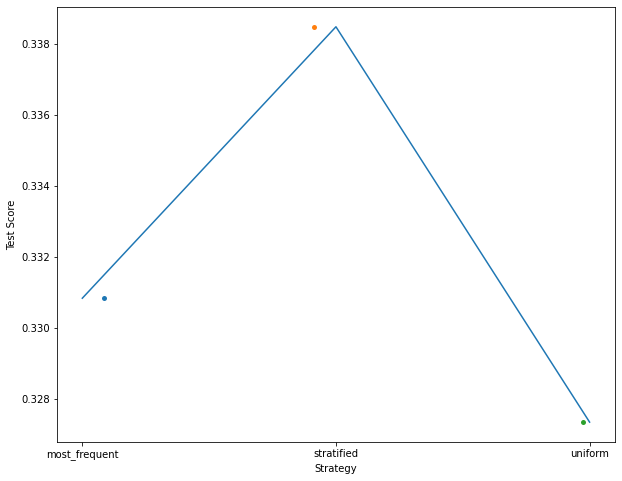

In [98]:
strategies = ['most_frequent','stratified', 'uniform'] 
test_scores = [] 
for s in strategies: 
    if s == 'most_frequent':
        dclf = DummyClassifier(strategy = s, random_state = 0) 
    else:
        dclf = DummyClassifier(strategy = s, random_state = 0) 
    dclf.fit(X_train_PCA1, y_train) 
    score = dclf.score(X_test_PCA1, y_test) 
    test_scores.append(score) 
print(test_scores)
plt.figure(figsize=(10,8))
ax = sns.stripplot(strategies,test_scores)
sns.lineplot(x=strategies,y=test_scores,ax=ax)
ax.set(xlabel ='Strategy', ylabel ='Test Score') 
plt.show() 

# Knn

the k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

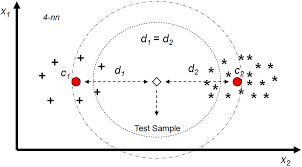

Confusion Matrix 


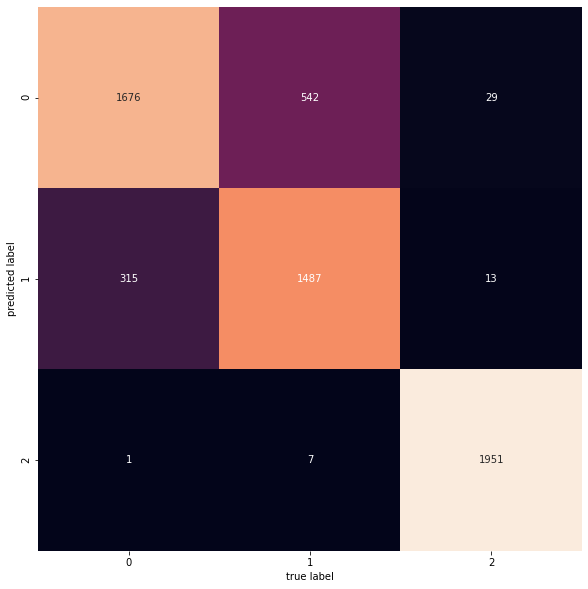

              precision    recall  f1-score   support

           0     0.7459    0.8414    0.7908      1992
           1     0.8193    0.7304    0.7723      2036
           2     0.9959    0.9789    0.9873      1993

    accuracy                         0.8494      6021
   macro avg     0.8537    0.8502    0.8501      6021
weighted avg     0.8535    0.8494    0.8496      6021



In [69]:
# Build knn model
knn = KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=3)
knn.fit(X_train_PCA1, y_train)
Y_pred = knn.predict(X_test_PCA1)

scores["knn"]=accuracy_score(y_test,Y_pred)
stats(knn)

In [70]:
#grid search to get the best paramters to this model
knn_param_grid =     {
         'n_neighbors': list(range(3,100,10)),
         'weights':['uniform','distance'],
         'metric': ['euclidean','manhattan','minkowski'],
        }

knn_grid_search = RandomizedSearchCV(
        KNeighborsClassifier(n_jobs=-1),
        knn_param_grid,
        cv=3,
        scoring='accuracy',
        return_train_score=True,
        random_state=0
    )
knn_grid_search.fit(X_train_PCA1, y_train)
    
knn_grid_search.best_estimator_

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=53,
                     weights='distance')

In [71]:
knn_grid_search.best_score_

0.8521077250630139

Confusion Matrix 


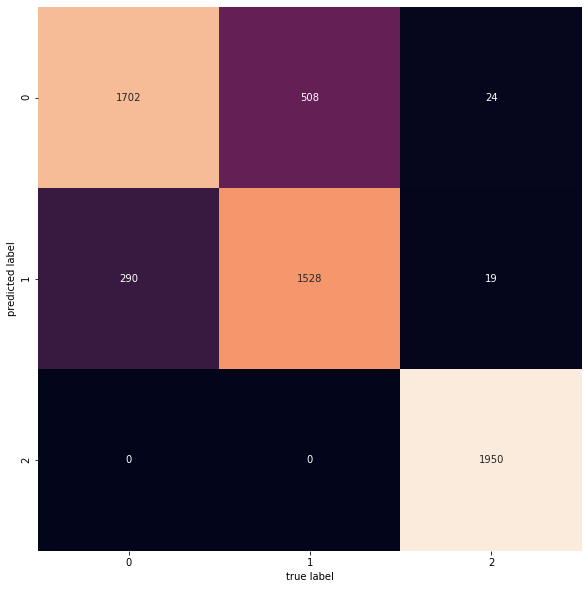

              precision    recall  f1-score   support

           0     0.7619    0.8544    0.8055      1992
           1     0.8318    0.7505    0.7891      2036
           2     1.0000    0.9784    0.9891      1993

    accuracy                         0.8603      6021
   macro avg     0.8646    0.8611    0.8612      6021
weighted avg     0.8643    0.8603    0.8607      6021



In [72]:
#checking the model with the new parameters
knn = KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=13,
                     weights='distance')
knn.fit(X_train_PCA1, y_train)
Y_pred = knn.predict(X_test_PCA1)

scores["knn"]=accuracy_score(y_test,Y_pred)
stats(knn)

# gaussian naive bayes

the Gaussian Processes Classifier is a classification machine learning algorithm.
Gaussian Processes are a generalization of the Gaussian probability distribution and can be used as the basis for sophisticated non-parametric machine learning algorithms for classification and regression

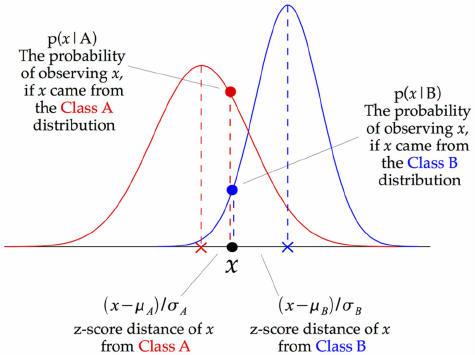

Confusion Matrix 


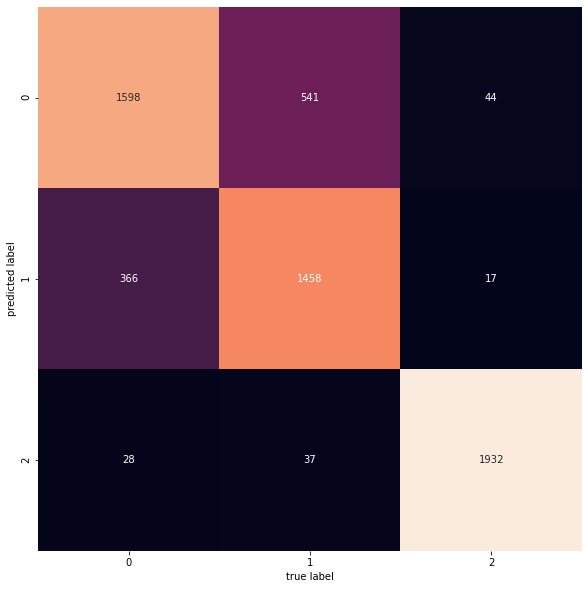

              precision    recall  f1-score   support

           0     0.7320    0.8022    0.7655      1992
           1     0.7920    0.7161    0.7521      2036
           2     0.9675    0.9694    0.9684      1993

    accuracy                         0.8284      6021
   macro avg     0.8305    0.8292    0.8287      6021
weighted avg     0.8302    0.8284    0.8281      6021



In [73]:
# Build gaussian naive bayes model
gnb = GaussianNB()
gnb.fit(X_train_PCA1,y_train)
y_pred = gnb.predict(X_test_PCA1)
scores["gnb"]=accuracy_score(y_test, y_pred)
stats(gnb)

# LogisticRegression

Logistic regression is a linear algorithm (with a non-linear transform on output).
It does assume a linear relationship between the input variables with the output. Data transforms of your input variables that better expose this linear relationship can result in a more accurate model

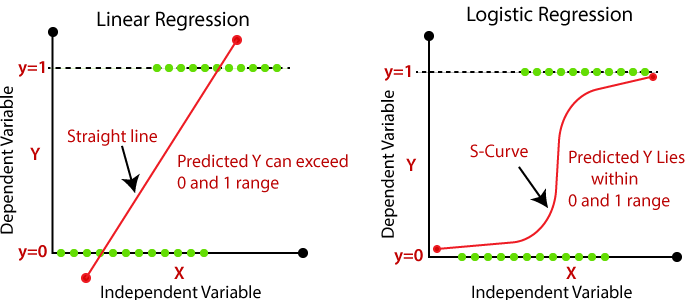

Confusion Matrix 


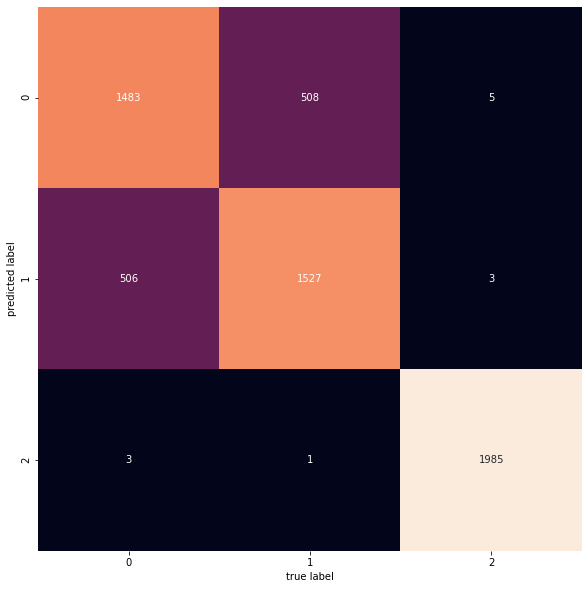

              precision    recall  f1-score   support

           0     0.7430    0.7445    0.7437      1992
           1     0.7500    0.7500    0.7500      2036
           2     0.9980    0.9960    0.9970      1993

    accuracy                         0.8296      6021
   macro avg     0.8303    0.8302    0.8302      6021
weighted avg     0.8298    0.8296    0.8297      6021



In [80]:
# Build LogisticRegression model
clf_log = LogisticRegression(n_jobs = -1)
clf_log.fit(X_train_PCA1,y_train)
y_pred_logistic= clf_log.predict(X_test_PCA1)
scores["clf_log"]=accuracy_score(y_test, y_pred_logistic)
stats(clf_log)

# Random forest

It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems.
A random forest algorithm consists of many decision trees

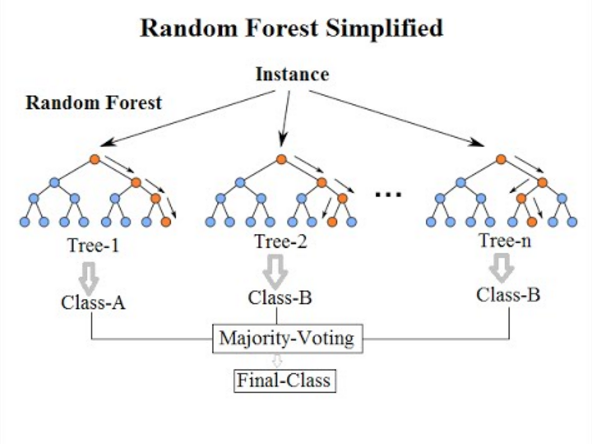

Confusion Matrix 


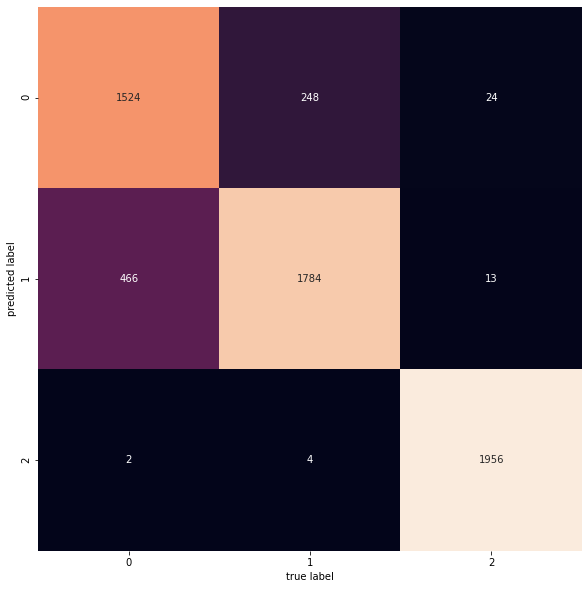

              precision    recall  f1-score   support

           0     0.8486    0.7651    0.8046      1992
           1     0.7883    0.8762    0.8300      2036
           2     0.9969    0.9814    0.9891      1993

    accuracy                         0.8743      6021
   macro avg     0.8779    0.8742    0.8746      6021
weighted avg     0.8773    0.8743    0.8743      6021



In [75]:
# Build random forest model
random_forest = RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=400,
                       n_jobs=-1, random_state=0)
random_forest.fit(X_train_PCA1, y_train)
y_pred_forest = random_forest.predict(X_test_pca)

scores["random_forest"]=accuracy_score(y_test, y_pred_forest)
stats(random_forest)

In [ ]:
#grid search to get the best paramters to this model
forest_params = {
     'n_estimators': [100,200,400],
     'max_depth':[None,30,100],
     'max_features': ['auto','sqrt','log2'],
     'random_state':[0]
}

forest_grid_search = RandomizedSearchCV(
    RandomForestClassifier(n_jobs=-1),
    forest_params,
    cv=3,
    scoring='accuracy',
    return_train_score=True,
    random_state=0
)

forest_grid_search.fit(X_train_PCA1, y_train)
forest_grid_search.best_estimator_

# xgBoost

xgBoost is an algorhitm that uses a more regularized model formalization to control over-fitting, which gives it better performance to get a better accucracy.

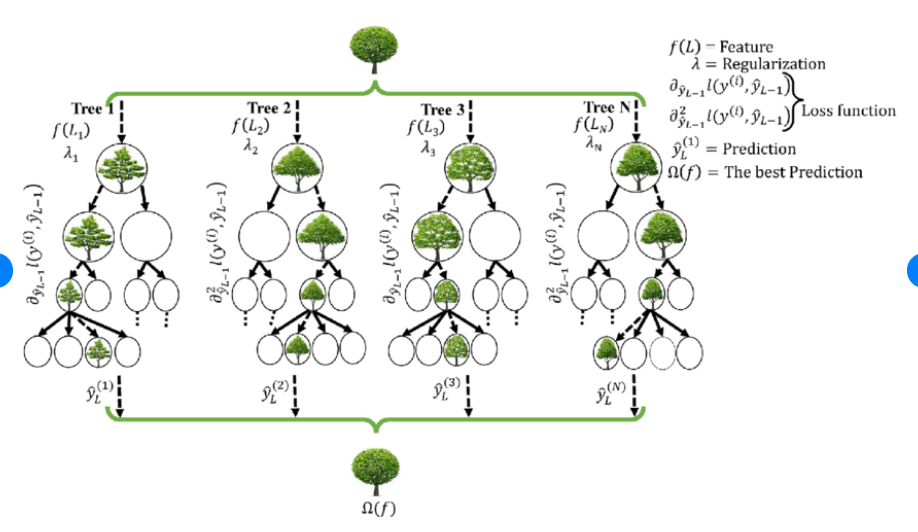

In [ ]:
#grid search to get the best paramters to this model
xgb_params = {
        'max_depth': [3,6,10],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 500, 1000],
        'colsample_bytree': [0.3, 0.7],
    }

xgb_clf = XGBClassifier(
        gamma = 0,
        colsample_bytree = 0.8)

XGBGridsearch = RandomizedSearchCV(xgb_clf, xgb_params,scoring='accuracy',cv=3, random_state=0,n_jobs=-1)
XGBGridsearch.fit(X_train_PCA1, y_train)

XGBGridsearch.best_estimator_

[23:10:59] WARNING: ..\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:10:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix 


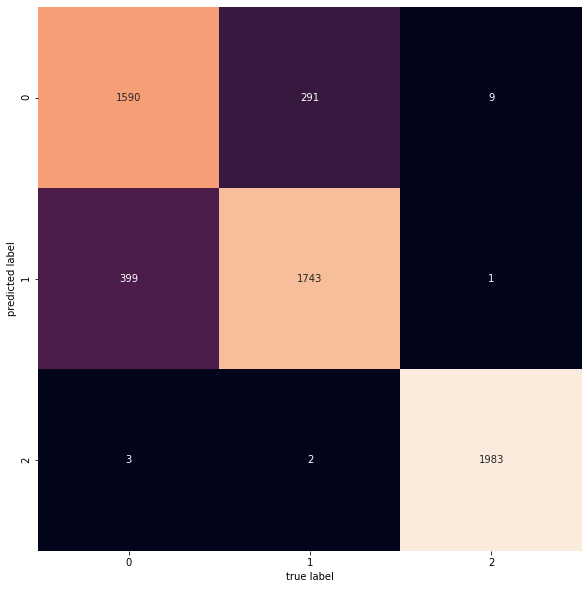

              precision    recall  f1-score   support

           0     0.8413    0.7982    0.8192      1992
           1     0.8133    0.8561    0.8342      2036
           2     0.9975    0.9950    0.9962      1993

    accuracy                         0.8829      6021
   macro avg     0.8840    0.8831    0.8832      6021
weighted avg     0.8835    0.8829    0.8829      6021



In [81]:
# Build xgboost model
xgb_reg = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb_reg.fit(X_train_PCA1, y_train)
y_pred = xgb_reg.predict(X_test_PCA1)

scores["XGBoost"]=accuracy_score(y_test,y_pred)
stats(xgb_reg)

# adaBoost

adaBoost algorithm, short for Adaptive Boosting, is a Boosting technique used as an Ensemble Method in Machine Learning. It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights assigned to incorrectly classified instances.

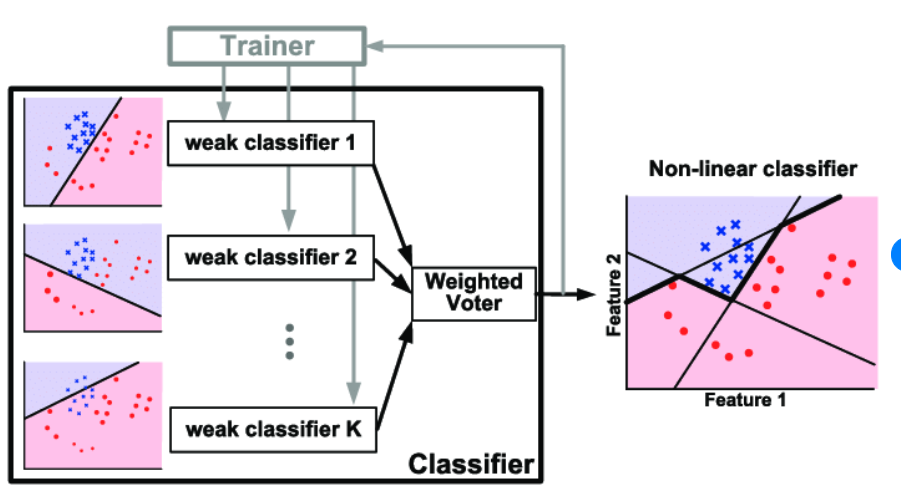

Confusion Matrix 


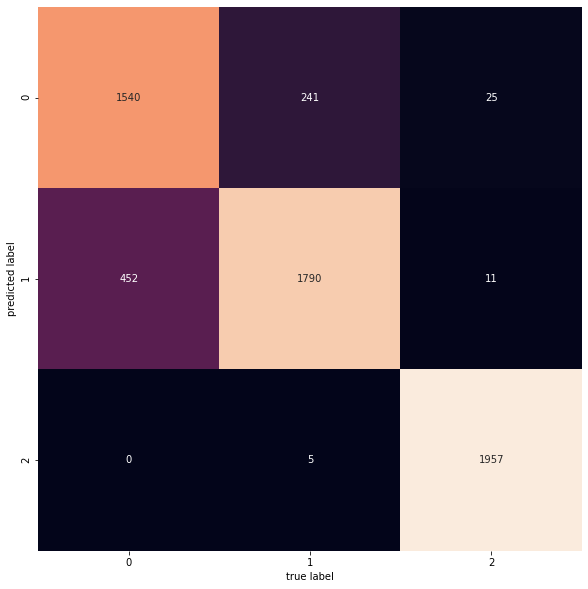

              precision    recall  f1-score   support

           0     0.8527    0.7731    0.8110      1992
           1     0.7945    0.8792    0.8347      2036
           2     0.9975    0.9819    0.9896      1993

    accuracy                         0.8781      6021
   macro avg     0.8816    0.8781    0.8784      6021
weighted avg     0.8809    0.8781    0.8781      6021



In [78]:
# set the adaboost model with the new form,after pca.
ada_classifier = AdaBoostClassifier(
    RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=400,
                       n_jobs=-1, random_state=0)
)
model=ada_classifier.fit(X_train_PCA1, y_train)
y_pred_ada = model.predict(X_test_pca)

scores["adaBoost"]=accuracy_score(y_test,y_pred_ada)
stats(model)

# Stacking

stacked Generalization, or stacking for short, is an ensemble machine learning algorithm. 
Stacking involves using a machine learning model to learn how to best combine the predictions from contributing ensemble members

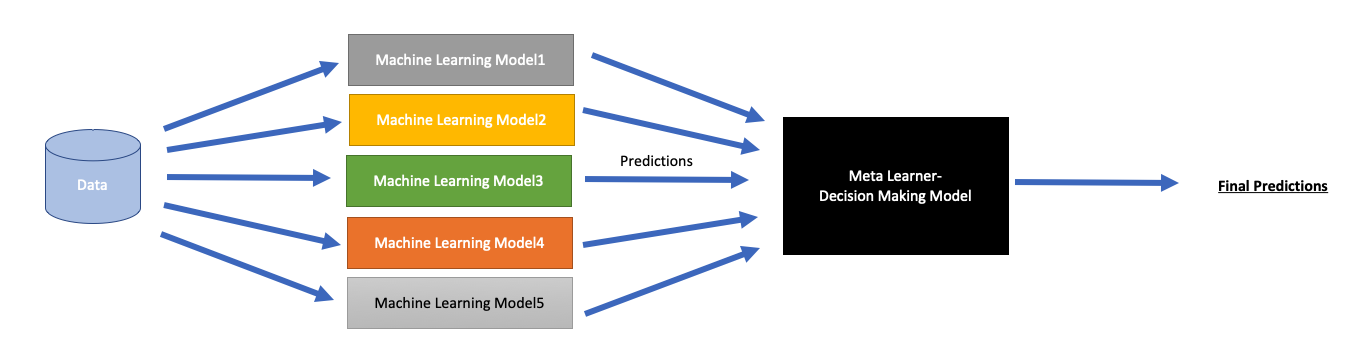

[23:19:28] WARNING: ..\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:19:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix 


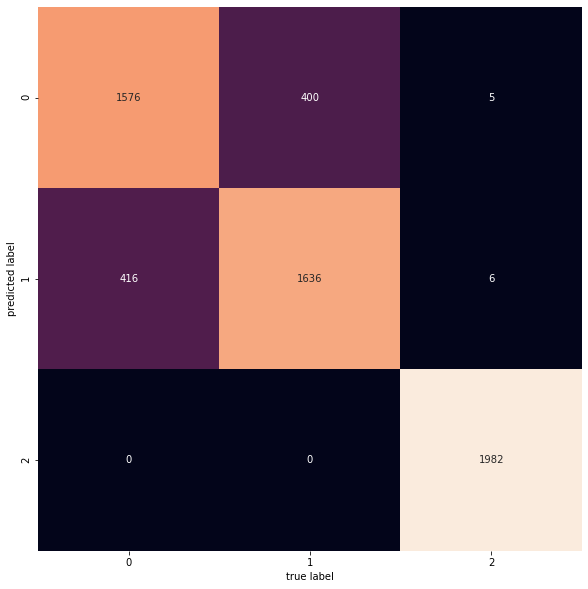

              precision    recall  f1-score   support

           0     0.7956    0.7912    0.7934      1992
           1     0.7949    0.8035    0.7992      2036
           2     1.0000    0.9945    0.9972      1993

    accuracy                         0.8626      6021
   macro avg     0.8635    0.8631    0.8633      6021
weighted avg     0.8630    0.8626    0.8628      6021



In [85]:
# Build stack model
stack_model = StackingClassifier(
    estimators=[('lr', clf_log), ('ada', ada_classifier),('knn_bag', BaggingClassifier(knn))],final_estimator=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None))
stack_model.fit(X_train_PCA1,y_train)
y_test_pred = stack_model.predict(X_test_PCA1)


scores["stack_model"]=accuracy_score(y_test, y_test_pred)
stats(stack_model)

# Voting

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting.

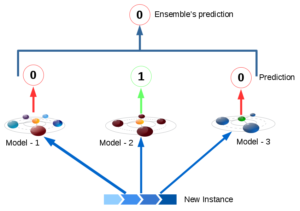

Confusion Matrix 


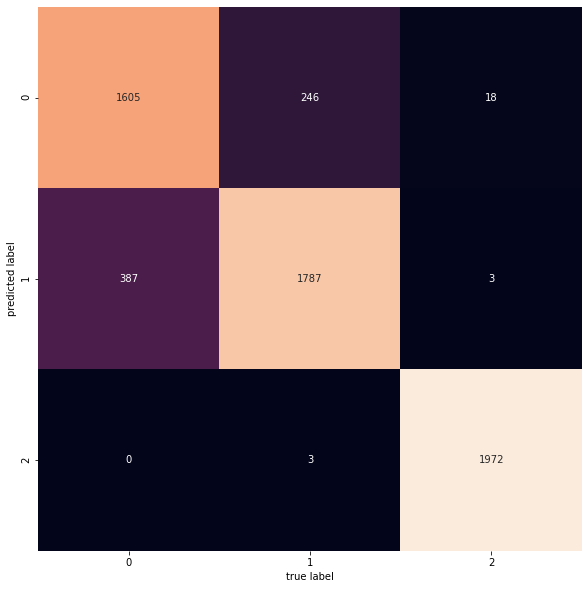

              precision    recall  f1-score   support

           0     0.8587    0.8057    0.8314      1992
           1     0.8209    0.8777    0.8483      2036
           2     0.9985    0.9895    0.9940      1993

    accuracy                         0.8909      6021
   macro avg     0.8927    0.8910    0.8912      6021
weighted avg     0.8922    0.8909    0.8909      6021



In [84]:
# Build "hard" voting model
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=400,
                       n_jobs=-1, random_state=0)
xgb_clf = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
ada_classifier = AdaBoostClassifier(
    RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=400,
                       n_jobs=-1, random_state=0)
)
knn = KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=53,
                     weights='distance')

voting_clf = VotingClassifier(
    estimators=[('ada', ada_classifier),('xgb', xgb_clf),('knn_bag', BaggingClassifier(knn))],voting='soft',weights=[10,1,1],n_jobs=-1)
voting_clf.fit(X_train_PCA1,y_train)
y_pred_clf=voting_clf.predict(X_test_PCA1)
scores["voting_clf"]=accuracy_score(y_test, y_pred_clf)
stats(voting_clf)

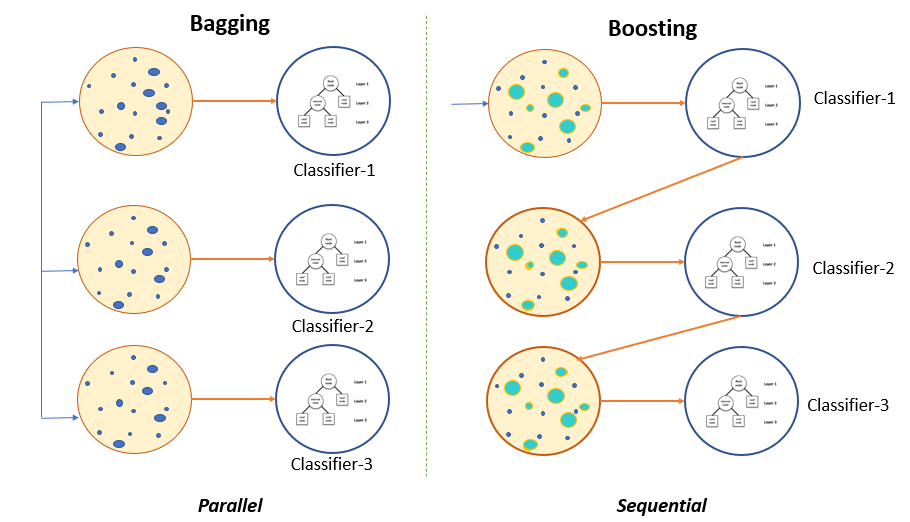

# conclusion

# after all the hard work, the best model is "voting model" with '89.09'% accuracy,and just 28 features(we start with 37)!!!